In [3]:

from ga_objects.problems.multi_objective_problems import ProblemMulti
from ga_objects.problems.single_objective_problems import ProblemSingle
from pymoo.operators.crossover.pntx import TwoPointCrossover
from ga_objects.operators.mutation import IntegerPolynomialMutation
import warnings
import logging
import itertools
from ga_objects.utils.problemSetup import ProblemSetup
from datetime import datetime
import os
from ga_objects.operators.terminator import DiversityTermination

logging.getLogger('matplotlib').setLevel(logging.WARNING)
warnings.filterwarnings("ignore", ".*feasible.*")

# test configuration lists

pop_list = [4000]
num_event_list = [90]
declare_model_list = ["model4.decl"]
mutation_list = [IntegerPolynomialMutation(prob=0.5, eta=1)] # higher eta value results in smaller mutations (more localized changes), lower eta value leads to larger mutations (more exploratory behavior).
crossover_list = [TwoPointCrossover(prob=0.9)] # eta was default 8
problem_list = [ProblemSingle]
termination_list = [DiversityTermination(0.9, 200)]




In [4]:
current_date = datetime.today().strftime('%m-%d-%H-%M')

for run in range(1, 2):
    directory = f"results/{current_date}"
    os.makedirs(directory, exist_ok=True)
    file_name = f"{directory}/result.csv"

    with open(file_name, "a") as f:
        f.write("ID,Population,TraceLength,Model,Problem,Mutation,Termination,"
                "ExecutionTime,DiversityScore,ConstraintScore,Generations,Iteration\n")
        ID = 1

        # iterate through all configurations
        for combination in itertools.product(pop_list, num_event_list, declare_model_list, mutation_list, crossover_list,
                                             problem_list,termination_list):
            pop_size, trace_length, model, mutation, crossover, problem, termination = combination


            print(f"Running ID={ID}: Population={pop_size}, TraceLength={trace_length}, Model={model}, "
                  f"Problem={problem.__name__}, Mutation={type(mutation).__name__} eta={mutation.eta} prob={mutation.prob.value}, Crossover={type(crossover).__name__}. Termination={type(termination).__name__}")

            problemSetup = ProblemSetup(pop_size, trace_length, model, mutation, crossover, problem, termination)
            problemSetup.run(run, ID, f, model, f"{directory}/plots", f"{directory}/encoded_traces")

            ID += 1

Running ID=1: Population=4000, TraceLength=90, Model=model4.decl, Problem=ProblemSingle, Mutation=IntegerPolynomialMutation eta=1 prob=0.5, Crossover=TwoPointCrossover. Termination=DiversityTermination
[0.5785185185185185, 0.5732818593537273, 0.5801433983495874, 0.5656030646550526, 0.5841135408852213, 0.5952503209135617, 0.6015556889222305, 0.6058615278819705, 0.6117832291406184, 0.6199833930704897, 0.6266627948653829, 0.6332979967214025, 0.6402859951098885, 0.6459685588063683, 0.6523361215303826, 0.6582112125253535, 0.6651298769136729, 0.671184798977522, 0.67672651635131, 0.682045304381651, 0.6881254758133978, 0.6945953863465866, 0.7005208857769999, 0.7069460087244033, 0.7120887249590175, 0.7181367161234753, 0.7231445222416715, 0.7280528382095525, 0.7321431052207497, 0.7373075810619321, 0.7424852671501209, 0.7463092828762746, 0.7508238837487149, 0.7549833083270819, 0.7596416367980884, 0.7647689130615987, 0.7702294531966325, 0.7749950140312856, 0.7780310146981191, 0.782405186018727, 0.

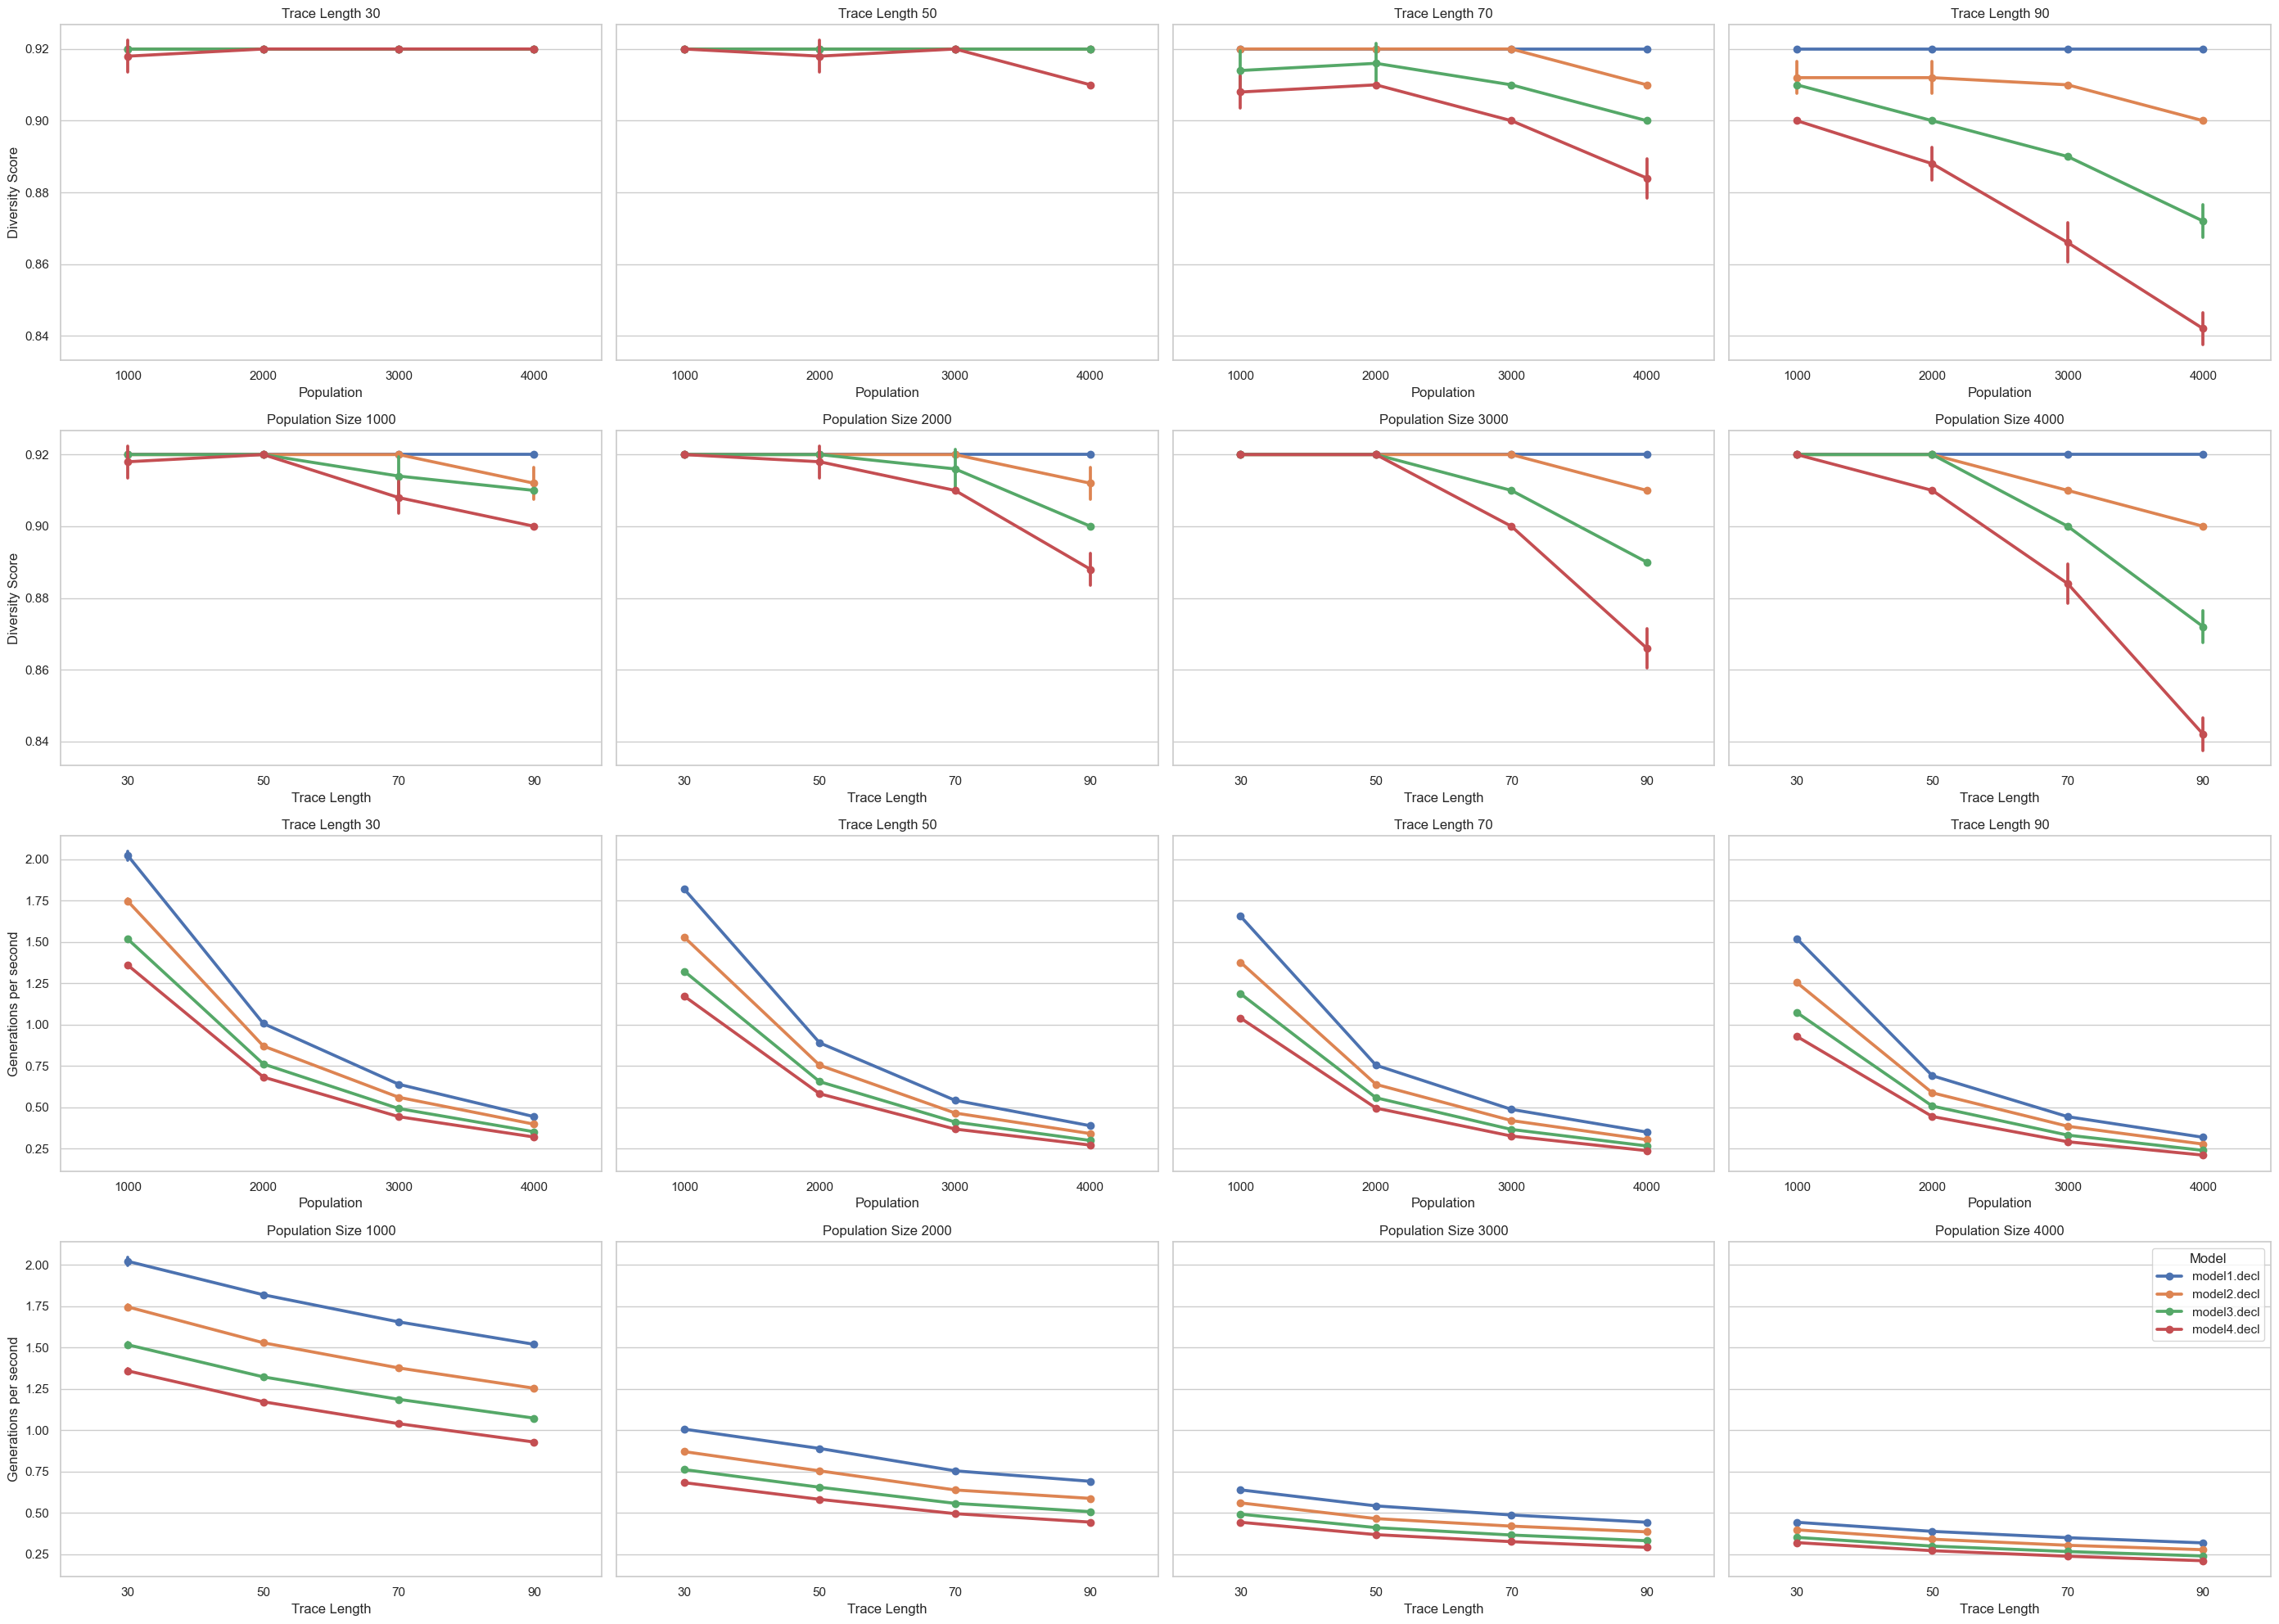

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
single_GA_test_date = "04-16-01-59"
multi_GA_test_date = "04-17-16-32"
df = pd.read_csv(f"results/{multi_GA_test_date}/result.csv", sep=',')

# Compute Generations/sec per row and add to df
df['Generations_per_s'] = df['Generations'] / df['ExecutionTime']

# Unique values
trace_lengths = sorted(df['TraceLength'].unique())
pop_sizes = sorted(df['Population'].unique())

# Set Seaborn style
sns.set(style="whitegrid")

# Create figure with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(28, 20), sharey='row')

# --- First row: Diversity vs Population, each plot for a TraceLength ---
for i, trace_length in enumerate(trace_lengths):
    ax = axes[0, i]
    sns.pointplot(
        data=df[df['TraceLength'] == trace_length],
        x='Population',
        y='DiversityScore',
        hue='Model',
        dodge=False,
        errorbar='sd',
        markersize=5,
        ax=ax,
    )
    ax.set_title(f'Trace Length {trace_length}')
    if i == 0:
        ax.set_ylabel('Diversity Score')
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Population')

# --- Second row: Diversity vs TraceLength, each plot for a PopSize ---
for i, pop_size in enumerate(pop_sizes):
    ax = axes[1, i]
    sns.pointplot(
        data=df[df['Population'] == pop_size],
        x='TraceLength',
        y='DiversityScore',
        hue='Model',
        dodge=False,
        errorbar='sd',
        markersize=5,
        ax=ax
    )
    ax.set_title(f'Population Size {pop_size}')
    if i == 0:
        ax.set_ylabel('Diversity Score')
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Trace Length')

# --- Third row: Generations/sec vs Population, each plot for a TraceLength ---
for i, trace_length in enumerate(trace_lengths):
    ax = axes[2, i]
    sns.pointplot(
        data=df[df['TraceLength'] == trace_length],
        x='Population',
        y='Generations_per_s',
        hue='Model',
        dodge=False,
        errorbar='sd',
        markersize=5,
        ax=ax
    )
    ax.set_title(f'Trace Length {trace_length}')
    if i == 0:
        ax.set_ylabel('Generations per second')
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Population')

# --- Fourth row: Generations/sec vs TraceLength, each plot for a PopSize ---
for i, pop_size in enumerate(pop_sizes):
    ax = axes[3, i]
    sns.pointplot(
        data=df[df['Population'] == pop_size],
        x='TraceLength',
        y='Generations_per_s',
        hue='Model',
        dodge=False,
        errorbar='sd',
        markersize=5,
        ax=ax
    )
    ax.set_title(f'Population Size {pop_size}')
    if i == 0:
        ax.set_ylabel('Generations per second')
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Trace Length')

# --- Move shared legend to the side ---
handles, labels = axes[3, 0].get_legend_handles_labels()


# Remove individual legends
for ax in axes.flat:
    ax.get_legend().remove()

axes[3, -1].legend(handles, labels, title='Model', loc='upper right')
# Adjust layout
plt.tight_layout()


# Save to file
plt.savefig("plotsMGA.png", dpi=300)

plt.show()


In [27]:
from PIL import Image, ImageDraw, ImageFont
single_GA_test_date = "04-16-01-59"
multi_GA_test_date = "04-17-16-32"

# Load your images
img1 = Image.open(f"results/{single_GA_test_date}/plots/ID_61_run_4_ProblemSingle.png")
img2 = Image.open(f"results/{single_GA_test_date}/plots/ID_62_run_4_ProblemSingle.png")
img3 = Image.open(f"results/{single_GA_test_date}/plots/ID_63_run_4_ProblemSingle.png")
img4 = Image.open(f"results/{single_GA_test_date}/plots/ID_64_run_4_ProblemSingle.png")

w, h = img1.size
subtitle_height = 40

# New image size
new_w = 2 * w
new_h = 2 * (h + subtitle_height)

# Create blank canvas
new_img = Image.new("RGB", (new_w, new_h), (255, 255, 255))

# Font
try:
    font = ImageFont.truetype("arial.ttf", 24)
except:
    font = ImageFont.load_default()

draw = ImageDraw.Draw(new_img)

images = [img1, img2, img3, img4]
titles = ["Model1 - Population 4000 - Trace Length 90", "Model2 - Population 4000 - Trace Length 90",
          "Model3 - Population 4000 - Trace Length 90", "Model4 - Population 4000 - Trace Length 90"]

# Positions: (x, y) for image top-left
positions = [(0, 0), (w, 0), (0, h + subtitle_height), (w, h + subtitle_height)]

for img, title, (x, y) in zip(images, titles, positions):
    new_img.paste(img, (x, y))

    # Use textbbox instead of textsize
    bbox = draw.textbbox((0, 0), title, font=font)
    text_w = bbox[2] - bbox[0]
    text_x = x + (w - text_w) // 2
    text_y = y + h + 5
    draw.text((text_x, text_y), title, fill=(0, 0, 0), font=font)

# Save final image
new_img.save("final_4x2_plotsSGA.png")

C:\Users\matte\AppData\Local\Temp\ipykernel_13784\997406260.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\matte\AppData\Local\Temp\ipykernel_13784\997406260.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


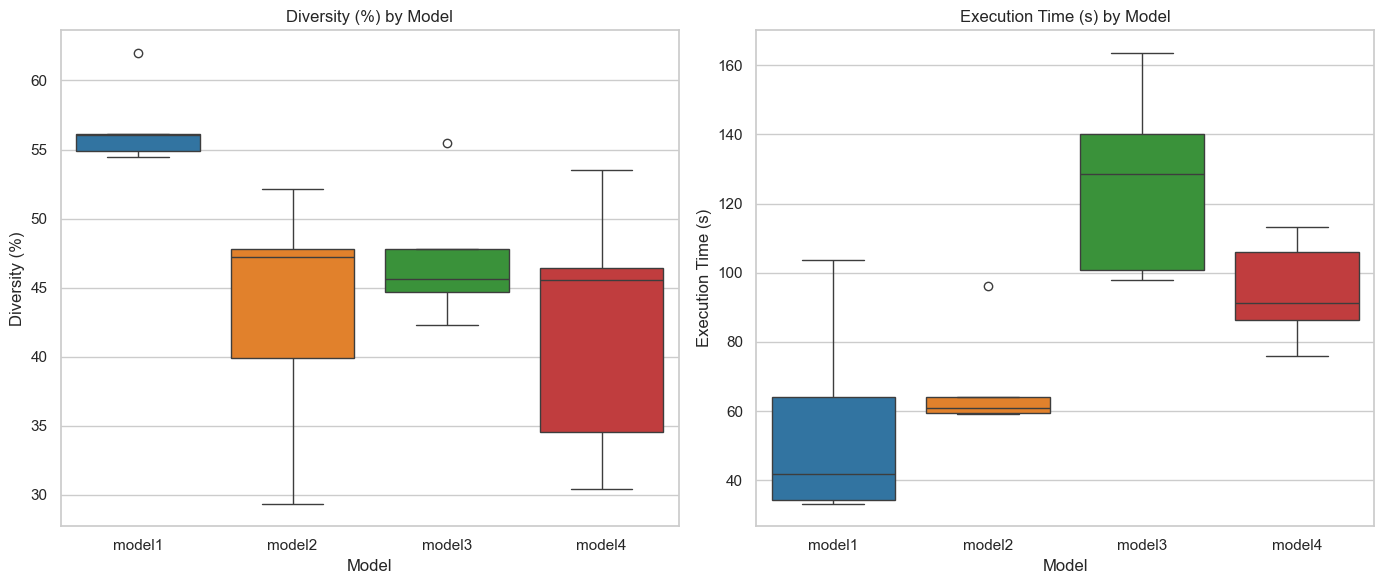

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("results/ASPresults.csv")

# Clean up ExecTime column: remove 's' and convert to float
df['ExecTime'] = df['ExecTime'].str.replace('s', '').astype(float)

# Convert diversity to percentage
df['Diversity'] = df['Diversity'] * 100


# Group by Model, compute mean ExecTime and mean Diversity%
grouped = df.groupby('Model').agg({
    'ExecTime': 'mean',
    'Diversity': 'mean'
}).reset_index()

# Set seaborn style
sns.set(style="whitegrid")

palette = {
    'model1': '#1f77b4',
    'model2': '#ff7f0e',
    'model3': '#2ca02c',
    'model4': '#d62728'
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Diversity %
sns.boxplot(
    data=df,
    x='Model',
    y='Diversity',
    ax=axes[0],
    palette=palette
)

axes[0].set_title('Diversity (%) by Model')
axes[0].set_ylabel('Diversity (%)')
axes[0].set_xlabel('Model')

# Plot 2: Execution Time
sns.boxplot(
    data=df,
    x='Model',
    y='ExecTime',
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Execution Time (s) by Model')
axes[1].set_ylabel('Execution Time (s)')
axes[1].set_xlabel('Model')

# Adjust layout and show
plt.tight_layout()
plt.savefig("model_performance_pointplots.png", dpi=300)

plt.show()


In [7]:
import pandas as pd

single_GA_test_date = "04-16-01-59"
multi_GA_test_date = "04-17-16-32"

# Load your images
csv = f"results/{single_GA_test_date}/result.csv"
# Converte le colonne numeriche
cols_to_convert = ['DiversityScore', 'ConstraintScore', 'Generations']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Raggruppa per Model, Population, TraceLength
grouped = df.groupby(['Model', 'Population', 'TraceLength'])

# Calcola media e std
summary = grouped.agg({
    'DiversityScore': ['mean', 'std'],
    'ConstraintScore': ['mean', 'std'],
    'Generations': ['mean', 'std']
})

# Appiattisci l'header multi-livello
summary.columns = [
    'DiversityScoreMean', 'DiversityScoreStd',
    'ConstraintScoreMean', 'ConstraintScoreStd',
    'GenerationsMean', 'GenerationsStd'
]

# Arrotonda a 2 decimali
summary = summary.round(2)



# Salva su CSV
summary.to_csv('GA_Table.csv')


In [3]:
import pandas as pd


# Leggi CSV
df = pd.read_csv('GA_Table.csv', sep=';')

# Arrotonda tutte le colonne numeriche a 2 cifre decimali
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].round(2)

# Crea le righe LaTeX
latex_rows = []
for index, row in df.iterrows():
    latex_row = f"{row['Model']} & {int(row['Population'])} & {int(row['TraceLength'])} & {row['DiversityScoreMean']:.2f} & {row['DiversityScoreStd']:.2f} & {row['ConstraintScoreMean']:.2f} & {row['ConstraintScoreStd']:.2f} & {row['GenerationsMean']:.2f} & {row['GenerationsStd']:.2f} \\\\"
    latex_rows.append(latex_row)


KeyError: 'Model'

In [2]:

import pandas as pd
single_GA_test_date = "04-16-01-59"
multi_GA_test_date = "04-17-16-32"

# Load your images
csv = f"results/{single_GA_test_date}/result.csv"
# Carica i due CSV
df1 = pd.read_csv(f"results/{single_GA_test_date}/result.csv")
df2 = pd.read_csv(f"results/{multi_GA_test_date}/result.csv")

def process_csv(df):
    grouped = df.groupby(['Model', 'Population', 'TraceLength']).agg({
        'DiversityScore': 'mean',
        'ConstraintScore': 'mean',
        'Generations': 'mean'
    }).reset_index()
    grouped['Generations'] = grouped['Generations'] / 300
    grouped = grouped.round(2)
    return grouped

# Applica funzione ai due CSV
summary1 = process_csv(df1)
summary2 = process_csv(df2)

# Merge sui campi comuni
merged = pd.merge(summary1, summary2, on=['Model', 'Population', 'TraceLength'], suffixes=('1', '2'))

# Inizio tabella LaTeX
latex_table = r"""\begin{table}[H]
\centering
\caption{Confronto performance su due esperimenti}
\begin{tabularx}{\textwidth}{l r r r r r r r r}
\toprule
Model & Pop & TLength & Div.Mean1 & Div.Mean2 & Con.Mean1 & Con.Mean2 & Gen.Mean1 & Gen.Mean2 \\
\midrule
"""

# Aggiunge le righe
for index, row in merged.iterrows():
    latex_row = f"{row['Model']} & {int(row['Population'])} & {int(row['TraceLength'])} & {row['DiversityScore1']:.2f} & {row['DiversityScore2']:.2f} & {row['ConstraintScore1']:.2f} & {row['ConstraintScore2']:.2f} & {row['Generations1']:.2f} & {row['Generations2']:.2f} \\\\\n"
    latex_table += latex_row

# Chiude tabella
latex_table += r"""\bottomrule
\end{tabularx}
\label{tab:confronto_due_exp}
\end{table}
"""

# Scrive su file
with open('tabella_confronto_due_exp.tex', 'w') as f:
    f.write(latex_table)